In [381]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

# Read the City and Ride Data
city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset

combined_data = pd.merge(city_data_df, ride_data_df, on="city")


# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [382]:
city_avg_fare = combined_data.groupby(["city"]).mean()["fare"]


In [383]:
city_rides = combined_data.groupby(["city"]).count()["ride_id"]


In [384]:
city_type = combined_data["type"].value_counts()


In [385]:
driver = combined_data.groupby(["city"]).mean()["driver_count"]


## Bubble Plot of Ride Sharing Data

In [440]:
urban_data = combined_data[combined_data["type"] == "Urban"]
urban_avg_fare = urban_data.groupby(["city"]).mean()["fare"]
urban_rides = urban_data.groupby(["city"]).count()["ride_id"]
urban_driver = urban_data.groupby(["city"]).mean()["driver_count"]
urban_fare = urban_data.groupby(["type"]).sum()["fare"]
urban_total_ride = urban_data.groupby(["type"]).count()["ride_id"]

rural_data = combined_data[combined_data["type"] == "Rural"]
rural_avg_fare = rural_data.groupby(["city"]).mean()["fare"]
rural_rides = rural_data.groupby(["city"]).count()["ride_id"]
rural_driver = rural_data.groupby(["city"]).mean()["driver_count"]
rural_fare = rural_data.groupby(["type"]).sum()["fare"]
rural_total_ride = rural_data.groupby(["type"]).count()["ride_id"]

sub_data = combined_data[combined_data["type"] == "Suburban"]
sub_avg_fare = sub_data.groupby(["city"]).mean()["fare"]
sub_rides = sub_data.groupby(["city"]).count()["ride_id"]
sub_driver = sub_data.groupby(["city"]).mean()["driver_count"]
sub_fare = sub_data.groupby(["type"]).sum()["fare"]
sub_total_ride = sub_data.groupby(["type"]).count()["ride_id"]
sub_total_driver = sub_data.groupby(["type"]).sum()["driver_count"]

total_fare = combined_data["fare"].sum()
total_ride = combined_data["ride_id"].count()
total_driver = rural_driver.sum() + urban_driver.sum() + sub_driver.sum()



In [441]:
total_driver

2973.0

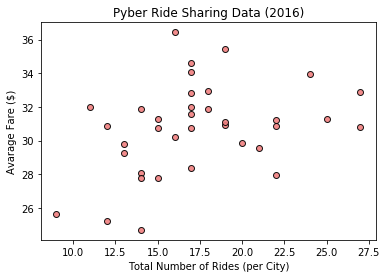

In [442]:
# Obtain the x and y coordinates for each of the three city types

sub_x = sub_rides
sub_y = sub_avg_fare
sub_s = sub_driver

# Build the scatter plots for each city types

plt.scatter(sub_x, sub_y, c="lightcoral", edgecolor="black", alpha=.9)


# Incorporate the other graph properties

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avarage Fare ($)")





# Incorporate a text label regarding circle size

# Save Figure
plt.show()

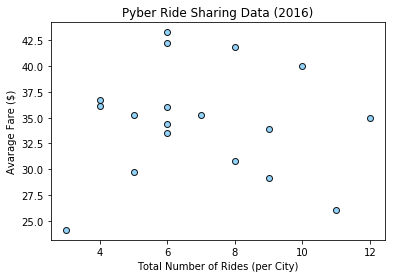

In [443]:
# Obtain the x and y coordinates for each of the three city types

rural_x = rural_rides
rural_y = rural_avg_fare
rural_s = rural_driver



# Build the scatter plots for each city types

plt.scatter(rural_x, rural_y, c="lightskyblue", edgecolor="black", alpha=.9)


# Incorporate the other graph properties

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avarage Fare ($)")





# Incorporate a text label regarding circle size

# Save Figure
plt.show()

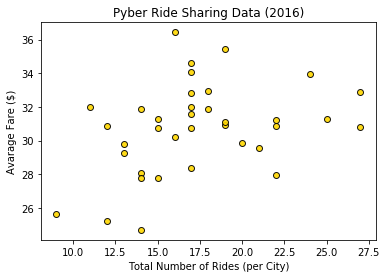

In [444]:
# Obtain the x and y coordinates for each of the three city types

sub_x = sub_rides
sub_y = sub_avg_fare
sub_s = sub_driver



# Build the scatter plots for each city types

plt.scatter(sub_x, sub_y, c="gold", edgecolor="black", alpha=.9)


# Incorporate the other graph properties

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avarage Fare ($)")





# Incorporate a text label regarding circle size

# Save Figure
plt.show()

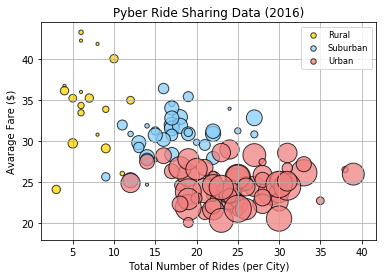

In [445]:
plt.scatter(rural_x, rural_y, s=rural_s*10, c='gold', edgecolor="black", alpha=.75, label="Rural")
plt.scatter(sub_x, sub_y, s=sub_s*10, c="lightskyblue", edgecolor="black", alpha=.75, label="Suburban")
plt.scatter(urban_x, urban_y, s=urban_s*10, c="lightcoral", edgecolor="black", alpha=.75, label="Urban")
plt.legend(loc='upper right')
lgnd = plt.legend(fontsize="small", loc='best', mode="expanded", numpoints=1, scatterpoints=1, labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avarage Fare ($)")

plt.grid()
plt.show()

## Total Fares by City Type

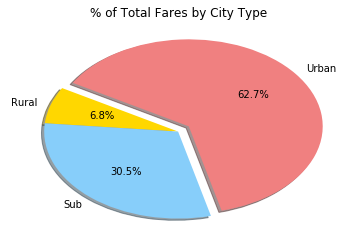

In [459]:
# Calculate Type Percents
Urban_percent = urban_fare/total_fare
Rural_percent = rural_fare/total_fare
Sub_percent = sub_fare/total_fare

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Sub",  "Urban"]

# The values of each section of the pie chart
sizes = [Rural_percent, Sub_percent, Urban_percent] 

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0, 0.1)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.show()

In [447]:
# Show Figure
plt.show()

## Total Rides by City Type

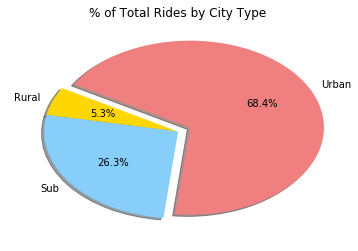

In [460]:
# Calculate Ride Percents
Urban_ride_percent = urban_total_ride/total_ride
Rural_ride_percent = rural_total_ride/total_ride
Sub_ride_percent = sub_total_ride/total_ride

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Sub",  "Urban"]

# The values of each section of the pie chart
sizes = [Rural_ride_percent, Sub_ride_percent, Urban_ride_percent] 

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0, 0.1)

plt.title("% of Total Rides by City Type")
# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.show()


In [449]:
# Show Figure
plt.show()

## Total Drivers by City Type

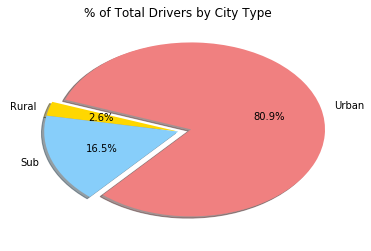

In [461]:
# Calculate Driver Percents
Urban_driver_percent = urban_driver.sum()/total_driver
Rural_driver_percent = rural_driver.sum()/total_driver
Sub_driver_percent = sub_driver.sum()/total_driver

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Sub",  "Urban"]

# The values of each section of the pie chart
sizes = [Rural_driver_percent, Sub_driver_percent, Urban_driver_percent] 

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.show()